## **Math 569: Statistical Learning** 



## Final Project - Predicting Telecom Customer Churn 

The written report is available at: https://drive.google.com/file/d/18p0I26FE5S0tK3qW0CL-OoPGuNlSnKd1/view?usp=drive_link 

### Introduction

Customer churn is a critical business problem for subscription-based services such as telecommunications. Losing customers not only reduces revenue but also increases the cost of customer acquisition and retention. In this project, we aim to build predictive models to identify customers who are likely to churn, using the **Telco Customer Churn (IBM Version)** dataset from Kaggle.

The dataset contains 7,043 records and 21+ features, including customer demographics, service usage patterns, account information, and billing history. The target variable, **`Churn`**, indicates whether a customer has discontinued service (`Yes`) or not (`No`).

Our goals in this project are threefold:
1. **Prediction** – Can we predict customer churn with good accuracy (targeting over 60%) using account, demographic, and usage data?
2. **Insight** – What features are the most influential in predicting churn?
3. **Model Comparison** – Which machine learning algorithms offer the best balance between predictive power and computational efficiency for potential production use?

We will explore and evaluate a range of models including:
- **Logistic Regression** – A fast and interpretable baseline model
- **Support Vector Machines (SVM)** – For capturing complex boundaries with kernel tricks
- **Decision Trees and Random Forests** – For robust, nonlinear classification and feature importance
- **Multi-Layer Perceptron (Neural Network)** – For modeling higher-order interactions

By the end of this project, we aim to identify a practical and interpretable solution that telecom providers can use to anticipate customer churn and take proactive retention actions.

In [114]:
# Install kagglehub package for accessing Kaggle datasets
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\jacky\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### (1) Dataset Retrival and Preliminary Inspection

In [ ]:
# Import necessary libraries and download the dataset
import kagglehub
import os
import pandas as pd 

path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")
print("The dataset file has been downloaded to:", path)
print("Files in the datset directory:", os.listdir(path))

file_path = os.path.join(path, "Telco_customer_churn.xlsx")
print(file_path)

df = pd.read_excel(file_path)

# Take a quick look at the dataset

print("\n Dataset shape:", df.shape)
print("\n First 5 rows:")
print(df.head(5))

The dataset file has been downloaded to: C:\Users\jacky\.cache\kagglehub\datasets\yeanzc\telco-customer-churn-ibm-dataset\versions\1
Files in the datset directory: ['Telco_customer_churn.xlsx']
C:\Users\jacky\.cache\kagglehub\datasets\yeanzc\telco-customer-churn-ibm-dataset\versions\1\Telco_customer_churn.xlsx

 Dataset shape: (7043, 33)

 First 5 rows:
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 

##### Dataset Inspection

Inspect the data type of each column and also check if there are any missing values. 

In [116]:
# Examine the columns, their data types and if there are any missing values
print("Columns and data types:")
print(df.dtypes)
print("\nNumber of Columns by data type:")
print(df.dtypes.value_counts())
# Basic Summary of Missing Values
print("\nMissing values:\n", df.isnull().sum())

Columns and data types:
CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

Numb

**Customer ID**: This is a unique identifier for each customer. It has no predictive value and is not related to customer behavior or churn. Such identifiers are typically dropped in modeling workflows.

In [117]:
# Convert 'Total Charges' to float64, coercing non-numeric entries to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop 'CustomerID' and 'Count' columns
df.drop(columns=['CustomerID', 'Count'], inplace=True)

# Examine the columns and their data types, again
print("Columns and data types:")
print(df.dtypes)
print("\nNumber of Columns by data type:")
print(df.dtypes.value_counts())
# Basic Summary of Missing Values
print("\nMissing values:\n", df.isnull().sum())

Columns and data types:
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

Number of Columns by data type:
object     22
int64       5
fl

#### (2) Exploratory Data Analysis

Three Steps:

- a. Determine the distribution of the target lables see if they are balanced or not. Which group is majority and which group is minority. This would impact our data-preprocessing and model selection. 
- b. Analysis for Numerical Variables
- c. Analysis for Categorical Variables

#### a. Churn Label Distribution 

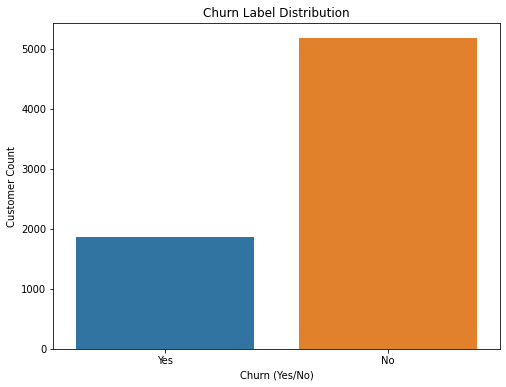

No     5174
Yes    1869
Name: Churn Label, dtype: int64


In [ ]:
# Exploratory Data Analysis (EDA)
# Churn Label Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Label', data=df)
plt.title('Churn Label Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()

print(df['Churn Label'].value_counts())


#### b. Examine Numerical Variables

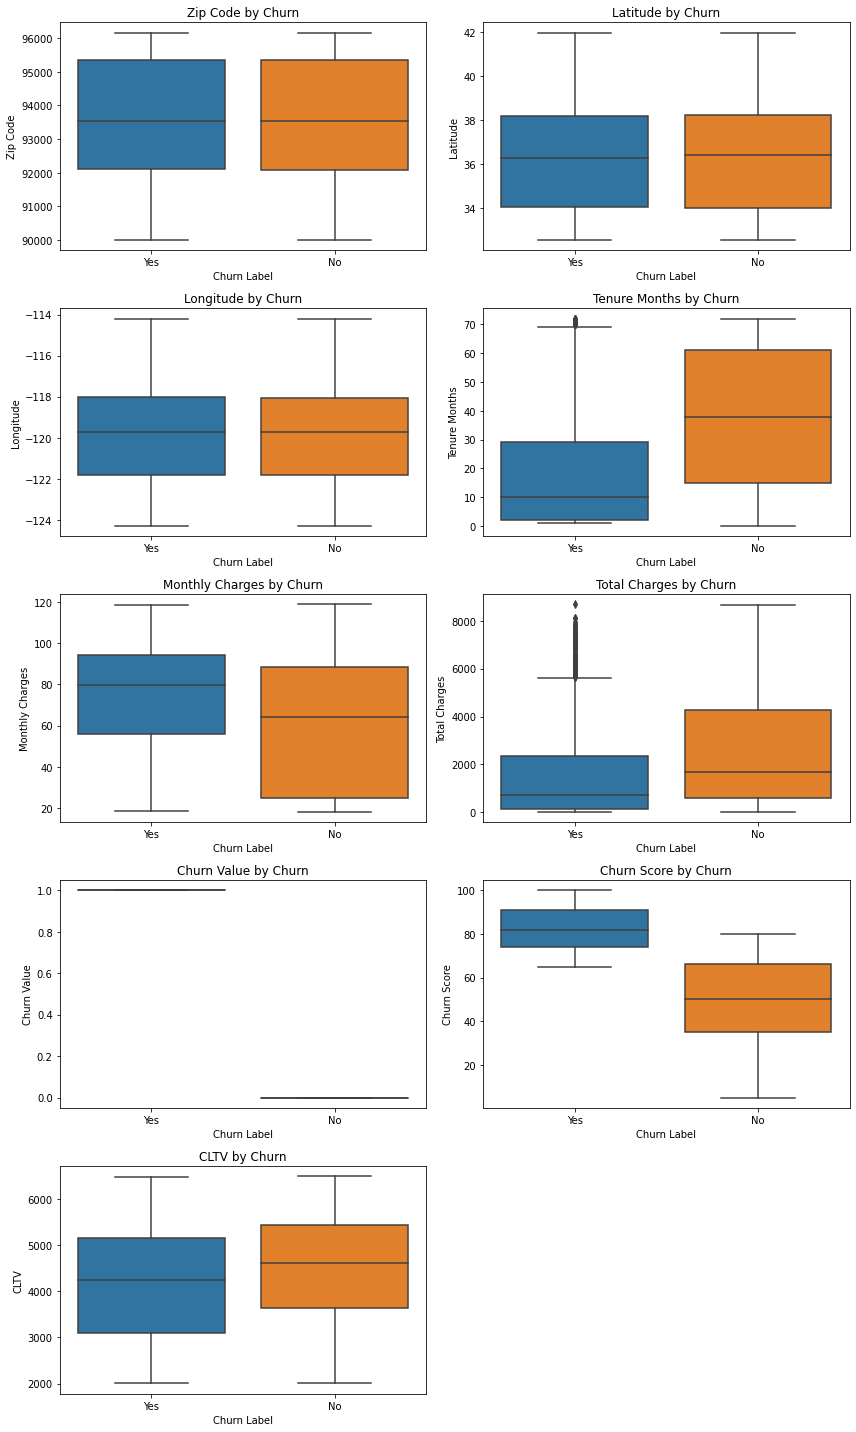

In [119]:
# Choose numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Setup subplot grid
n = len(num_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

# Visualize distributions of numerical features grouped by churn
for i, col in enumerate(num_cols):
    if col != "Churn Label":
        sns.boxplot(x='Churn Label', y=col, data=df, ax=axes[i])
        axes[i].set_title(f"{col} by Churn")
        axes[i].set_xlabel("Churn Label")
        axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The following columns should be dropped from the dataset based on box plots as shown above. 

- **Zip Code**: While potentially useful in location-specific studies, the box plot showed nearly identical distributions of zip codes for churned and non-churned customers. Since no discernible pattern or separation exists, this feature is unlikely to contribute to prediction and can be dropped.

- **Latitude and Longitude**: These geographic coordinates show no significant difference in distribution between churn groups. Without additional geospatial analysis (e.g., mapping to regions or clustering), these features add little value and can increase model complexity unnecessarily.

- **Churn Value**: This column appears to be either a constant or a binary representation of churn with no clear differentiation from the target. If it is a near-duplicate or alias for the `Churn Label`, it introduces redundancy and should be removed.

- **Churn Score**: Although it shows a very strong separation between churned and non-churned customers, this level of correlation is suspiciously high. It is likely derived from the target label itself, making it a leaky feature. Using it would result in inflated model performance and unrealistic results in production. Therefore, it was excluded from modeling.

Dropping these columns ensures that the remaining feature set contains only variables with actual predictive potential, avoids redundancy, and eliminates sources of data leakage that could compromise model evaluation.


In [120]:
columns_to_drop = [
    'Zip Code',      # Not predictive
    'Latitude',      # Not predictive
    'Longitude',     # Not predictive
    'Churn Value',   # Possibly a placeholder or constant
    'Churn Score'    # Redundant with Churn Label
]

df.drop(columns=columns_to_drop, inplace=True)

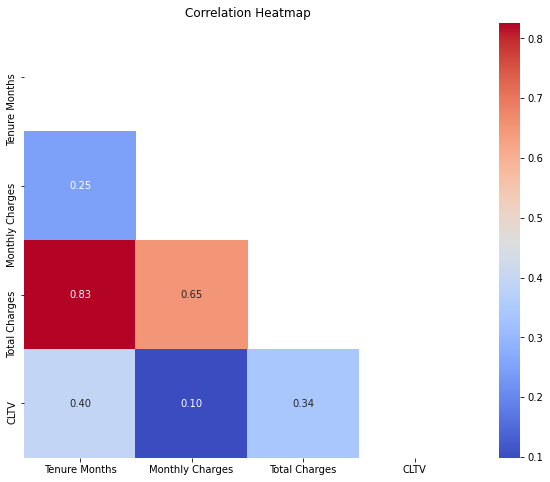

In [121]:
import numpy as np 

corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title("Correlation Heatmap")
plt.show()

##### Multicollinearity Handling

The correlation heatmap reveals strong multicollinearity, particularly between `Total Charges`, `Tenure Months`, and `Monthly Charges`. Since `Total Charges` is largely a product of the other two (i.e., Total ≈ Tenure × Monthly), it introduces redundancy into the dataset. To address this, we can remove `Total Charges` to reduce multicollinearity and improve the stability of models that are sensitive to correlated inputs, such as logistic regression. 


In [122]:
# Drop 'Total Charges' to reduce multicollinearity
df.drop(columns=['Total Charges'], inplace=True)

#### c. Examine Categorical Variables

In [123]:
# Select object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns

# Display category count and actual categories for each column
for col in cat_cols:
    unique_vals = df[col].unique()
    print(f"\n Column: {col}")
    print(f"->{len(unique_vals)} unique categories")
    print(f"-> Categories: {list(unique_vals)}")


 Column: Country
->1 unique categories
-> Categories: ['United States']

 Column: State
->1 unique categories
-> Categories: ['California']

 Column: City
->1129 unique categories
-> Categories: ['Los Angeles', 'Beverly Hills', 'Huntington Park', 'Lynwood', 'Marina Del Rey', 'Inglewood', 'Santa Monica', 'Torrance', 'Whittier', 'La Habra', 'Pico Rivera', 'Avalon', 'Harbor City', 'Lakewood', 'Los Alamitos', 'San Pedro', 'Carson', 'Long Beach', 'Altadena', 'Monrovia', 'Sierra Madre', 'Tujunga', 'Pasadena', 'Glendale', 'Canoga Park', 'Mission Hills', 'Santa Clarita', 'Sun Valley', 'Stevenson Ranch', 'Panorama City', 'Van Nuys', 'Burbank', 'North Hollywood', 'Covina', 'El Monte', 'La Puente', 'Rowland Heights', 'Ontario', 'Pomona', 'Rosemead', 'San Dimas', 'West Covina', 'Alhambra', 'Alpine', 'Bonita', 'Boulevard', 'Guatay', 'Jacumba', 'Mount Laguna', 'Borrego Springs', 'Carlsbad', 'Del Mar', 'El Cajon', 'Escondido', 'Oceanside', 'Pala', 'Palomar Mountain', 'Pauma Valley', 'Ranchita', 'Val

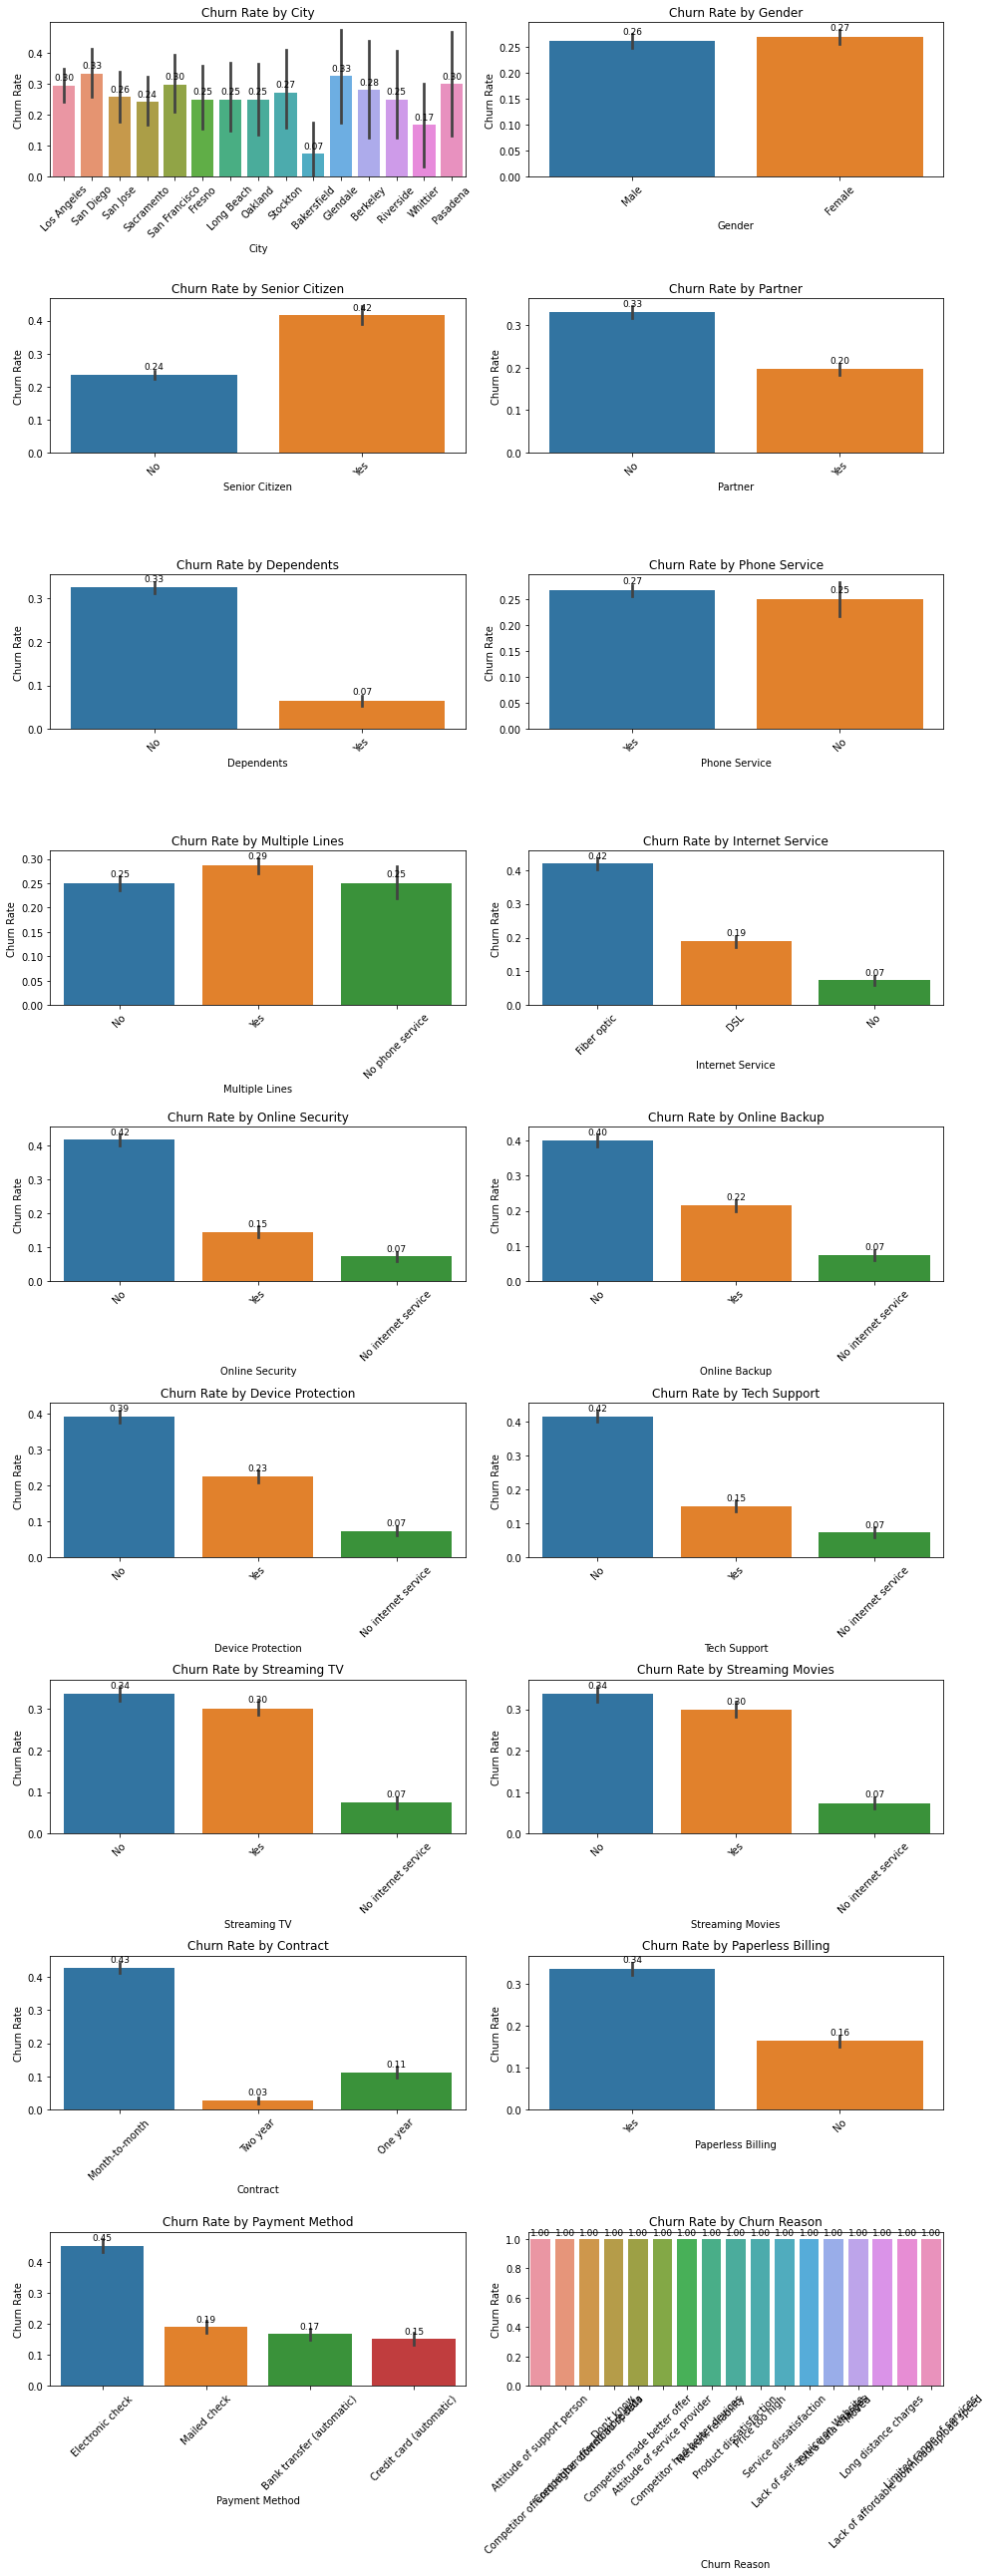

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Churn Label' to binary for plotting with seaborn
df_plot = df.copy()
df_plot['Churn Label'] = df_plot['Churn Label'].map({'Yes': 1, 'No': 0})

# Identify categorical columns
cat_cols = [col for col in df_plot.select_dtypes(include='object').columns]
min_count = 30

# Pre-filter columns to include only those with ≥2 valid categories
valid_cat_cols = []
for col in cat_cols:
    value_counts = df_plot[col].value_counts()
    if sum(value_counts >= min_count) >= 2:
        valid_cat_cols.append(col)

# Subplot layout
n = len(valid_cat_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

# Generate each subplot
for idx, col in enumerate(valid_cat_cols):
    ax = axes[idx]

    # Filter rare categories
    value_counts = df_plot[col].value_counts()
    valid_categories = value_counts[value_counts >= min_count].index
    filtered_df = df_plot[df_plot[col].isin(valid_categories)]

    # Barplot
    sns.barplot(x=col, y='Churn Label', data=filtered_df, order=valid_categories, ax=ax)
    ax.set_title(f"Churn Rate by {col}")
    ax.set_ylabel("Churn Rate")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)

    # Annotate bar values
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.01,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Drop Irrelevant Categorical Predictors

We will remove the following categorical columns based on data relevance and ethical considerations:

- **`Country`**: All records are from the United States, so the column contains no variability and provides no predictive value.
- **`State`**: All records are from California, making this column equally non-informative.
- **`City`**: Previous analysis showed that ZIP code had no meaningful relationship with the churn label. Since `City` is similarly granular and redundant, it should also be dropped.
- **`Lat Long`**: This is a string-based version of geographic coordinates, which duplicates the already excluded `Latitude` and `Longitude` columns. It is not useful in its current format.
- **`Churn Reason`**: This column is populated only for customers who have already churned. Including it would cause data leakage about the churn outcome (`Yes` or `No`) we aim to predict. 
- **`Gender`**: We chose to exclude `Gender` based on ethical considerations. Gender-based modeling risks reinforcing bias or discrimination in customer treatment strategies. Since initial analysis showed no strong relationship between gender and churn, excluding this variable promotes fairness without sacrificing predictive accuracy.

In [125]:
# Drop categorical columns, as explained above.
categorical_columns_to_drop = ['Country', 'State', 'City', 'Lat Long', 'Churn Reason', 'Gender']
df.drop(columns=categorical_columns_to_drop, inplace=True)

In [126]:
# Let's check the final shape of the dataset
print("Final dataset shape:", df.shape)
# Re-Check the columns and their data types
print("\nColumns and data types:")
print(df.dtypes)
# Re-Check the number of columns by data type
print("\nNumber of Columns by data type:")
print(df.dtypes.value_counts())
# Re-Check if there are any missing values
print("\nMissing values:") 
print(df.isnull().sum())

Final dataset shape: (7043, 19)

Columns and data types:
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Churn Label           object
CLTV                   int64
dtype: object

Number of Columns by data type:
object     16
int64       2
float64     1
dtype: int64

Missing values:
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV        

#### (3) Data Preprocessing and Preparation before Training

`Step 1: One-Hot Encoding of Categorical Variables`:
Categorical variables are transformed using one-hot encoding with the drop_first=True option to avoid multicollinearity. This ensures that the encoded features remain linearly independent, which is particularly important for models like logistic regression.

`Step 2: Train-Test Split with Stratified Sampling`:
The dataset is split into training and testing sets using stratified sampling (stratify=y) to preserve the original class distribution of the target labels. This is important for imbalanced classification tasks, like in our case of predicting customer churn, to ensure fair model evaluation.

`Step 3: Feature Scaling`: 
Numerical features are standardized using StandardScaler, which transforms them to have zero mean and unit variance = 1. This normalization step helps many machine learning algorithms (especially those relying on distance or gradient descent) perform more effectively and converge faster.

In [127]:
# Do one-hot encoding for categorical variables
x = df.drop(columns=['Churn Label'])
x_encoded = pd.get_dummies(x, drop_first=True)

y = df['Churn Label'].map({'Yes': 1, 'No': 0})

# Check the shape of the encoded feature set
print("\nEncoded DataFrame shape:", x_encoded.shape)

# Display the first few rows of the encoded DataFrame
# print("\nFirst 5 rows of the encoded DataFrame:")
# print(x_encoded.head())


Encoded DataFrame shape: (7043, 29)


The dataset split into training (80%), validation (10%), and test (10%) sets using stratified sampling to preserve the churn rate across subsets.

In [128]:
# Split the dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_encoded.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42, stratify=y)
# Split the temporary set into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

Perform Checks on dimensions of the datasets after the split. 

In [129]:
# Inspect x_train and y_train's data types and shapes
print("\nTraining set shape:", x_train.shape, y_train.shape)
print("\nValidation set shape:", x_val.shape, y_val.shape)
print("\nTest set shape:", x_test.shape, y_test.shape)


Training set shape: (5634, 29) (5634,)

Validation set shape: (704, 29) (704,)

Test set shape: (705, 29) (705,)


In [ ]:
# Standardize/scale the features using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform all sets
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)
# Check the shape of the scaled feature sets
print("\nScaled Training set shape:", x_train.shape)
print("Scaled Validation set shape:", x_val.shape)
print("Scaled Test set shape:", x_test.shape)


Scaled Training set shape: (5634, 29)
Scaled Validation set shape: (704, 29)
Scaled Test set shape: (705, 29)


#### (3) Model Training, Hyperparameter Tunings and Evaluation

##### a. Logistic Regression for Churn Classification

Logistic Regression is a widely used linear model for binary classification problems and serves as a strong baseline in this project. Unlike linear regression, which predicts continuous outcomes, logistic regression estimates the probability that an observation belongs to a particular class using the logistic (sigmoid) function.


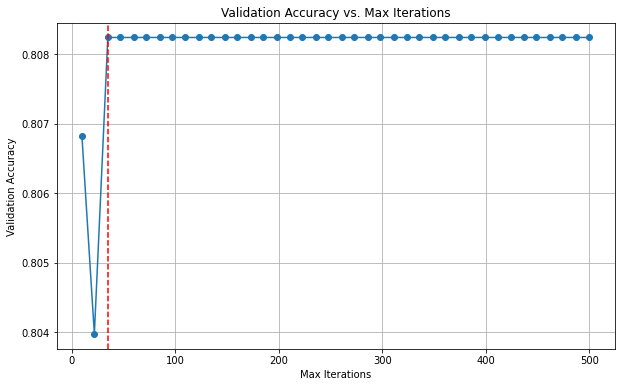

In [131]:
# Build a simple logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning) # Suppress convergence warnings

max_iter_list = np.linspace(10, 500, 40, dtype=int)
val_accuracy_list = []
for max_iter_value in max_iter_list:
    # Initialize the model
    log_reg_model = LogisticRegression(max_iter=max_iter_value, random_state=42)
    # Fit the model on the training data
    log_reg_model.fit(x_train, y_train)
    # Evaluate the model on the validation set
    y_val_pred = log_reg_model.predict(x_val)
    # Calculate accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_list.append(val_accuracy)

# Plot validation accuracy vs. max iterations to find the optimal number of iterations
plt.figure(figsize=(10, 6))
plt.plot(max_iter_list, val_accuracy_list, marker='o')
plt.title('Validation Accuracy vs. Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Validation Accuracy')
plt.axvline(x=max_iter_list[np.argmax(val_accuracy_list)], color='red', linestyle='--', label='Best Accuracy')
plt.grid()
plt.show()

In [132]:
# Find the optimal max_iter value
optimal_max_iter = max_iter_list[np.argmax(val_accuracy_list)]
print(f"Optimal max_iter: {optimal_max_iter}")

# Max accuracy from the validation set
optimal_max_accuracy = max(val_accuracy_list)
print(f"Max validation accuracy: {optimal_max_accuracy:.4f}")

Optimal max_iter: 35
Max validation accuracy: 0.8082


In [133]:
# Combine training and validation sets for final model training

x_train_valid = np.concatenate((x_train, x_val))
y_train_valid = np.concatenate((y_train, y_val))

# Re-initialize the model with the optimal max_iter
log_reg_model_final = LogisticRegression(max_iter=optimal_max_iter, random_state=42)

# Fit the model on the combined training and validation set
log_reg_model_final.fit(x_train_valid, y_train_valid)

# Evaluate the model on the test set
y_test_pred = log_reg_model_final.predict(x_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.7957

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       518
           1       0.64      0.53      0.58       187

    accuracy                           0.80       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.79      0.80      0.79       705



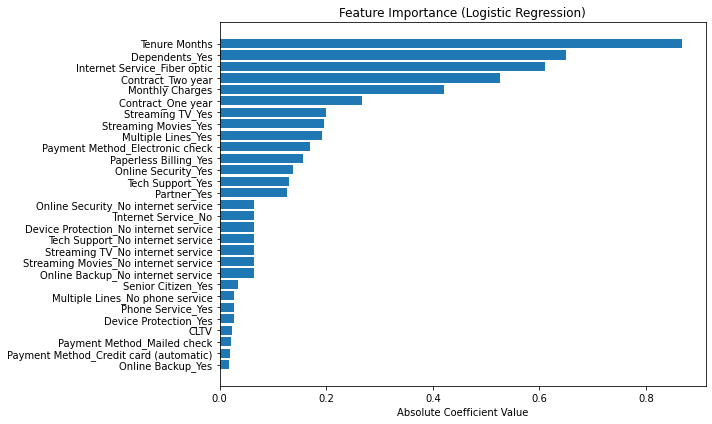

In [134]:
# Evaluate feature importance using coefficients from the logistic regression model

coefs = log_reg_model_final.coef_[0]  # shape: (n_features,)
features = x_encoded.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Absolute Coefficient': np.abs(coefs)
}).sort_values(by='Absolute Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



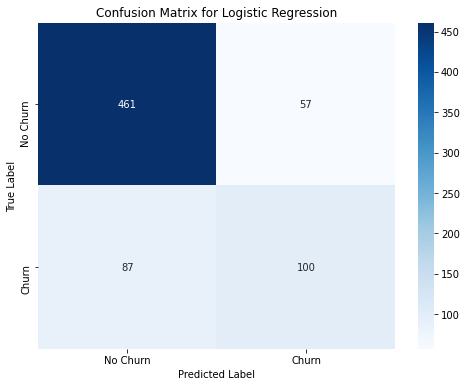

In [135]:
# Confusion matrix for logistic regression

confusion_matrix_log_reg = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##### b. Support Vector Machine (SVM) Classifier:

Support Vector Machine (SVM), a popular supervised learning model for classification problems, which is covered in Module 8 of this course, aims to find the optimal hyperplane that separates data points from different classes with the maximum possible margin. In the case of linearly separable data, SVM constructs a linear decision boundary defined by a subset of training points called support vectors. For non-linearly separable problems, SVM can incorporate kernel functions to map data into a higher-dimensional space where a linear separation becomes feasible. This makes SVM highly effective for classification tasks, particularly when the dataset is high-dimensional or the boundary between classes is complex.

##### b.1 Linear Kernel:

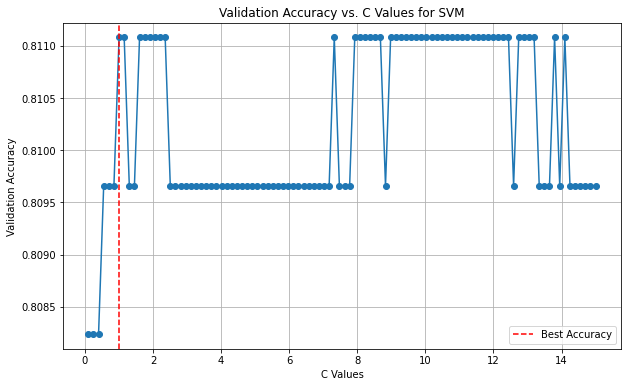

Optimal C value for SVM: 1.0


In [136]:
# Let's build another model using Support Vector Machine (SVM): SVM Classifier
from sklearn.svm import SVC

# Set the regularization parameter C for SVM
C_list = np.linspace(0.1, 15, 100)

val_accuracy_svm_list = []

for C in C_list:
    # Initialize the SVM model 
    svm_model = SVC(kernel='linear', C=C, random_state=42)

    # Fit the SVM model on the training data
    svm_model.fit(x_train, y_train)

    # Evaluate the SVM model on the validation set
    y_val_pred_svm = svm_model.predict(x_val)

    # Calculate accuracy for SVM
    val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
    val_accuracy_svm_list.append(val_accuracy_svm)

# Plot validation accuracy vs. C values for SVM
plt.figure(figsize=(10, 6))
plt.plot(C_list, val_accuracy_svm_list, marker='o')
plt.title('Validation Accuracy vs. C Values for SVM')
plt.xlabel('C Values')
plt.ylabel('Validation Accuracy')
plt.axvline(x=C_list[np.argmax(val_accuracy_svm_list)], color='red', linestyle='--', label='Best Accuracy')
plt.grid()
plt.legend()
plt.show()

# The optimal C value is the one that gives the highest validation accuracy
optimal_C = C_list[np.argmax(val_accuracy_svm_list)]
print(f"Optimal C value for SVM: {np.round(optimal_C,2)}")


In [137]:
print(f"The highest accuracy when Optimal C is used: {np.round(np.max(val_accuracy_svm_list),4)}")

The highest accuracy when Optimal C is used: 0.8111


##### b.2 RBF Kernel:

<Figure size 720x432 with 0 Axes>

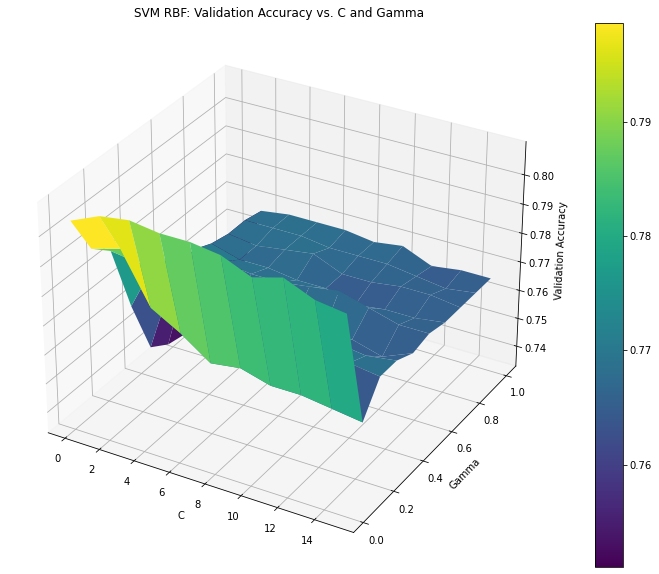

In [ ]:
#  Try RBF kernel for SVM with different gamma and C values
#  The SVM algorithm is very slow, so we will use a grid search approach to find the best combination of C and gamma values.

from itertools import product
from mpl_toolkits.mplot3d import Axes3D

C_list = np.linspace(0.1, 15, 10)

gamma_list = np.linspace(0.01, 1, 10)

results = []

for C, gamma_value in product(C_list, gamma_list):
    # Initialize the SVM model 
    svm_model_rbf = SVC(kernel='rbf', C=C, gamma=gamma_value, random_state=42)
    
    # Fit the SVM model on the training data
    svm_model_rbf.fit(x_train, y_train)

    # Evaluate the SVM model on the validation set
    y_val_pred_svm_rbf = svm_model_rbf.predict(x_val)

    # Calculate accuracy for SVM
    val_accuracy_svm_rbf = accuracy_score(y_val, y_val_pred_svm_rbf)

    results.append((C, gamma_value, val_accuracy_svm_rbf))

# Plot validation accuracy vs. C  and gamma values for SVM - 3d
plt.figure(figsize=(10, 6))

df_plot = pd.DataFrame(results, columns=['C', 'gamma', 'accuracy'])
pivot_table = df_plot.pivot(index='gamma', columns='C', values='accuracy')

C_grid, gamma_grid = np.meshgrid(pivot_table.columns, pivot_table.index)
accuracy_grid = pivot_table.values

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(C_grid, gamma_grid, accuracy_grid, cmap='viridis')
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Validation Accuracy')
ax.set_title('SVM RBF: Validation Accuracy vs. C and Gamma')
fig.colorbar(surf)
plt.show()

In [183]:
# The best C and gamma values can be found by looking at the maximum accuracy in the results DataFrame
best_result = df_plot.loc[df_plot['accuracy'].idxmax()]

# Print the best C and gamma values
print(f"Best C value: {best_result['C']:.2f}")
print(f"Best gamma value: {best_result['gamma']:.2f}")
print(f"Best validation accuracy: {best_result['accuracy']:.4f}")

Best C value: 3.41
Best gamma value: 0.01
Best validation accuracy: 0.8097


##### Test for Linear Kernel Based SVM Classifier

In [ ]:
#  Linear SVM with the optimal C value

# Finally, let's train the SVM model with the optimal C value on the combined training and validation set
svm_model_final = SVC(kernel='linear', C=optimal_C, random_state=42)
svm_model_final.fit(x_train_valid, y_train_valid)
# Evaluate the SVM model on the test set
y_test_pred_svm = svm_model_final.predict(x_test)
# Calculate accuracy on the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Test Accuracy for SVM: {test_accuracy_svm:.4f}")
# Print classification report for SVM
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_test_pred_svm))


Test Accuracy for SVM: 0.7915

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       518
           1       0.63      0.52      0.57       187

    accuracy                           0.79       705
   macro avg       0.73      0.70      0.72       705
weighted avg       0.78      0.79      0.78       705



##### Test for RBF Kernel Based SVM Classifier

In [ ]:
#  SVM with RBF kernel, optimal C and gamma values

# Finally, let's train the SVM model with the optimal C value on the combined training and validation set
svm_model_final_RBF = SVC(kernel='rbf', C=best_result['C'], gamma=best_result['gamma'], random_state=42)
svm_model_final_RBF.fit(x_train_valid, y_train_valid)
# Evaluate the SVM model on the test set
y_test_pred_svm_rbf = svm_model_final_RBF.predict(x_test)
# Calculate accuracy on the test set
test_accuracy_svm_rbf = accuracy_score(y_test, y_test_pred_svm_rbf)
print(f"Test Accuracy for SVM with RBF kernel: {test_accuracy_svm_rbf:.4f}")
# Print classification report for SVM with RBF kernel
print("\nClassification Report for SVM with RBF kernel:")
print(classification_report(y_test, y_test_pred_svm_rbf))


Test Accuracy for SVM with RBF kernel: 0.7858

Classification Report for SVM with RBF kernel:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       518
           1       0.63      0.48      0.54       187

    accuracy                           0.79       705
   macro avg       0.73      0.69      0.70       705
weighted avg       0.77      0.79      0.78       705



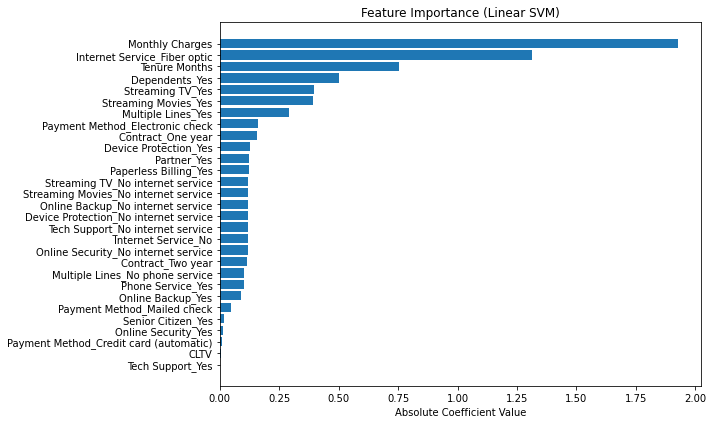

In [ ]:
# Evaluate the feature importance using coefficients from the SVM model

coefs_svm = svm_model.coef_[0] 
features = x_encoded.columns

importance_svm_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs_svm,
    'Absolute Coefficient': np.abs(coefs_svm)
}).sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance for SVM
plt.figure(figsize=(10, 6))
plt.barh(importance_svm_df['Feature'], importance_svm_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Linear SVM)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

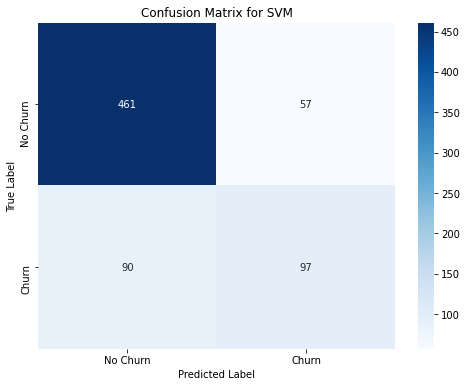

In [141]:
# Confusion matrix for SVM
confusion_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### c. Random Forest Classifier:
Random Forest is an ensemble learning algorithm, also covered in Module 9, which builds a collection of decision trees and combines their outputs to improve prediction accuracy and robustness. Each tree is trained on a random subset of the training data (bagging), and at each split, it considers a random subset of features to reduce correlation among trees. For classification tasks, the final prediction is made by majority voting across all trees in the forest. This ensemble approach helps mitigate overfitting and improves generalization compared to individual decision trees. Let's see if an ensemble model can outperform those $'individual'$ models discussed previously for this binary classification problem.

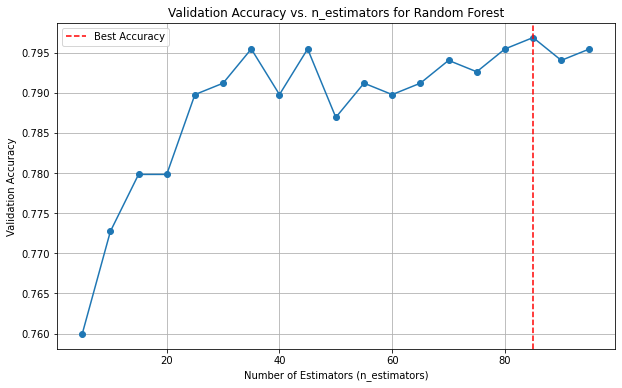

Optimal n_estimators value for Random Forest: 85
The highest accuracy when Optimal n_estimators is used: 0.7969


In [142]:
# Let's build another model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model with n_estimators
n_estimators = np.arange(5, 100, 5)
val_accuracy_rfc_list = []

for n in n_estimators:
    # Initialize the Random Forest model
    rfc_model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Fit the Random Forest model on the training data
    rfc_model.fit(x_train, y_train)

    # Evaluate the Random Forest model on the validation set
    y_val_pred_rfc = rfc_model.predict(x_val)

    # Calculate accuracy for Random Forest Classifier
    val_accuracy_rfc = accuracy_score(y_val, y_val_pred_rfc)
    val_accuracy_rfc_list.append(val_accuracy_rfc)

# Plot validation accuracy vs. n_estimators for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, val_accuracy_rfc_list, marker='o')
plt.title('Validation Accuracy vs. n_estimators for Random Forest')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Validation Accuracy')
plt.axvline(x=n_estimators[np.argmax(val_accuracy_rfc_list)], color='red', linestyle='--', label='Best Accuracy')
plt.grid()
plt.legend()
plt.show()
# The optimal n_estimators value is the one that gives the highest validation accuracy
optimal_n_estimators = n_estimators[np.argmax(val_accuracy_rfc_list)]
print(f"Optimal n_estimators value for Random Forest: {optimal_n_estimators}")
print(f"The highest accuracy when Optimal n_estimators is used: {np.round(np.max(val_accuracy_rfc_list),4)}")

In [143]:
# Let's build final Random Forest model with the optimal n_estimators value on the combined training and validation set
rfc_model_final = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
# Fit the Random Forest model on the combined training and validation set
rfc_model_final.fit(x_train_valid, y_train_valid)
# Evaluate the Random Forest model on the test set
y_test_pred_rfc = rfc_model_final.predict(x_test)
# Calculate accuracy on the test set
test_accuracy_rfc = accuracy_score(y_test, y_test_pred_rfc)
print(f"Test Accuracy for Random Forest: {test_accuracy_rfc:.4f}")
# Print classification report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rfc))


Test Accuracy for Random Forest: 0.7929

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       518
           1       0.64      0.50      0.56       187

    accuracy                           0.79       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.78      0.79      0.78       705



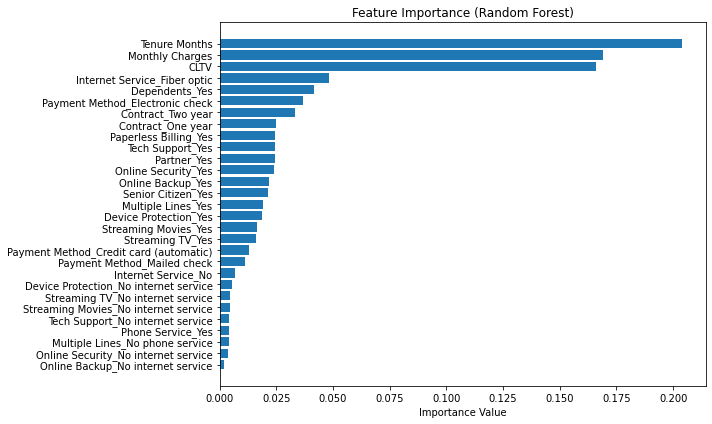

In [144]:
# Evaluate the feature importance using coefficients from the random forest model

importances = rfc_model_final.feature_importances_

# Turn into DataFrame for readability
importance_svm_df = pd.DataFrame({
    'Feature': x_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_svm_df['Feature'], importance_svm_df['Importance'])
plt.xlabel('Importance Value')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


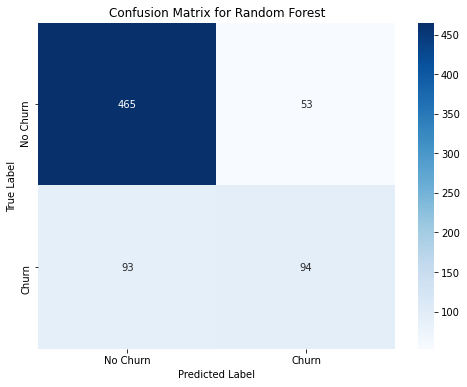

In [145]:
# Confusion matrix for Random Forest Classifier
confusion_matrix_rfc = confusion_matrix(y_test, y_test_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##### d. Multi-Layer Perceptron (Deep Neural Networks):

Deep neural networks are one of the most widely used methods for tackling classification problems, especially when the data is complex and contains non-linear patterns. In this project, I’ll be using a fully connected feed-forward neural network, also known as a multi-layer perceptron (MLP), to solve a binary classification task. An MLP consists of an input layer, one or more hidden layers, and an output layer. Each layer is made up of neurons (or nodes), and every neuron in one layer is connected to every neuron in the next layer. We usually apply a non-linear activation function like ReLU to the hidden layers, and a sigmoid function in the output layer for binary classification. To help the model train effectively and generalize well, I’ll also include techniques like dropout (to prevent overfitting), batch normalization (to stabilize learning), and early stopping (to avoid training for too long when the validation accuracy stops improving). Let’s build the model and see how it performs.

##### Structure of a Multi-Layer Perceptron (MLP) for Classification

A multi-layer perceptron (MLP) is a type of feed-forward neural network that is commonly used for classification tasks. It consists of an input layer, one or more hidden layers, and an output layer, where each layer is fully connected to the next. The goal is to learn a function $f(\mathbf{x}; \theta)$ that maps input features $\mathbf{x} \in \mathbb{R}^n$ to a binary output $y \in \{0,1\}$.

Each hidden layer applies a transformation of the form:

$z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}$

$a^{(l)} = \phi(z^{(l)})$

where:
- $W^{(l)}$ and $b^{(l)}$ are the weights and biases for layer $l$
- $\phi(\cdot)$ is a non-linear activation function (usually ReLU: $\phi(x) = \max(0, x)$)
- $a^{(l)}$ is the output of layer $l$

For binary classification, the output layer uses a sigmoid activation:

$\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$

This gives a probability between 0 and 1. The network is trained using binary cross-entropy loss:

$\mathcal{L}(y, \hat{y}) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$

Training is done via backpropagation and gradient descent, adjusting the weights to minimize the loss.



#### About Keras

Unlike using PyTorch or raw TensorFlow, which can be more complex and take a longer time to learn, Keras is a high-level API built into TensorFlow that makes building and training deep learning models much simpler and more intuitive. Even though it feels like a separate tool, Keras is really just a user-friendly interface — all the heavy lifting still happens behind the scenes with TensorFlow. So when we write code using Keras, we're still using TensorFlow to handle things like tensor operations, backpropagation, and GPU acceleration. For beginners and students like me, Keras is super helpful because it makes it easy to prototype neural networks without having to deal with low-level code. With Keras, we can try out different model architectures, loss functions, and optimizers in just a few lines. Therefore, I'll use Keras to build DNN in this project for the binary classification problem. 

In [ ]:
# Let's build the 1st model using deep neural networks with Keras

# First, we need to standardize the feature input data. 

'''
Gradient-based optimizations perform better when the input features are standardized, i.e., they have a mean of 0 and a standard deviation of 1.
This is especially important for neural networks, as they are sensitive to the scale of the input data

'''
#from sklearn.preprocessing import StandardScaler 
#scaler = StandardScaler()
# Actually, we have already scaled the feature set during the data pre-processing, so we can use the scaled data directly.
# x_train_scaled = scaler.fit_transform(x_train)
# x_val_scaled = scaler.transform(x_val)
# x_test_scaled = scaler.transform(x_test)

x_train_scaled = x_train
x_val_scaled = x_val
x_test_scaled = x_test

In [ ]:
# Build a simple deep neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_base = Sequential([
    
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Binary output for churn prediction
    
])

model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model 

hitory_base = model_base.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
177/177 [==============================] - 4s 5ms/step - loss: 0.4675 - accuracy: 0.7590 - val_loss: 0.4141 - val_accuracy: 0.7940
Epoch 2/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8090 - val_loss: 0.4128 - val_accuracy: 0.8068
Epoch 3/50
177/177 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.8110 - val_loss: 0.4111 - val_accuracy: 0.8082
Epoch 4/50
177/177 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.8154 - val_loss: 0.4081 - val_accuracy: 0.7926
Epoch 5/50
177/177 [==============================] - 1s 4ms/step - loss: 0.3895 - accuracy: 0.8142 - val_loss: 0.4075 - val_accuracy: 0.8011
Epoch 6/50
177/177 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8188 - val_loss: 0.4113 - val_accuracy: 0.8026
Epoch 7/50
177/177 [==============================] - 1s 5ms/step - loss: 0.3798 - accuracy: 0.8204 - val_loss: 0.4149 - val_accuracy: 0.7926
Epoch 

In [164]:
# Print the model summary
model_base.summary()

# Get the validation accuracy from the history object
val_accuracies = hitory_base.history['val_accuracy']

# Print the best (maximum) validation accuracy
print(f"Best validation accuracy: {max(val_accuracies):.4f}")

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                1920      
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dense_98 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4033 (15.75 KB)
Trainable params: 4033 (15.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Best validation accuracy: 0.8082


In [162]:
# Let's see if adding dropout layers can improve the model's performance and reduce overfitting

model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.3),  # randomly zero out 30% of weights
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
177/177 [==============================] - 4s 5ms/step - loss: 0.5182 - accuracy: 0.7325 - val_loss: 0.4294 - val_accuracy: 0.7997
Epoch 2/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4399 - accuracy: 0.7879 - val_loss: 0.4177 - val_accuracy: 0.7955
Epoch 3/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4266 - accuracy: 0.7987 - val_loss: 0.4167 - val_accuracy: 0.7898
Epoch 4/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4190 - accuracy: 0.7984 - val_loss: 0.4159 - val_accuracy: 0.7969
Epoch 5/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4109 - accuracy: 0.8056 - val_loss: 0.4140 - val_accuracy: 0.7997
Epoch 6/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4123 - accuracy: 0.8060 - val_loss: 0.4117 - val_accuracy: 0.7983
Epoch 7/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4090 - accuracy: 0.8069 - val_loss: 0.4119 - val_accuracy: 0.8111
Epoch 

In [163]:
# Print the model summary
model_dropout.summary()

# Get the validation accuracy from the history object
val_accuracies = history_dropout.history['val_accuracy']

# Print the best (maximum) validation accuracy
print(f"Best validation accuracy: {max(val_accuracies):.4f}")

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 64)                1920      
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 dense_100 (Dense)           (None, 32)                2080      
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                                 
 dense_101 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4033 (15.75 KB)
Trainable params: 4033 (15.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Best validation acc

In [165]:
from tensorflow.keras.layers import BatchNormalization
model_normalize = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model_normalize.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_normalize = model_normalize.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
177/177 [==============================] - 3s 6ms/step - loss: 0.5754 - accuracy: 0.7130 - val_loss: 0.4398 - val_accuracy: 0.7955
Epoch 2/50
177/177 [==============================] - 1s 6ms/step - loss: 0.4434 - accuracy: 0.7870 - val_loss: 0.4189 - val_accuracy: 0.7955
Epoch 3/50
177/177 [==============================] - 1s 6ms/step - loss: 0.4275 - accuracy: 0.7918 - val_loss: 0.4126 - val_accuracy: 0.8026
Epoch 4/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4242 - accuracy: 0.7929 - val_loss: 0.4137 - val_accuracy: 0.8011
Epoch 5/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8037 - val_loss: 0.4138 - val_accuracy: 0.7855
Epoch 6/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4111 - accuracy: 0.8023 - val_loss: 0.4103 - val_accuracy: 0.7940
Epoch 7/50
177/177 [==============================] - 1s 6ms/step - loss: 0.4099 - accuracy: 0.7978 - val_loss: 0.4091 - val_accuracy: 0.8082
Epoch 

In [166]:
# Print the model summary
model_normalize.summary()

# Get the validation accuracy from the history object
val_accuracies = history_normalize.history['val_accuracy']

# Print the best (maximum) validation accuracy
print(f"Best validation accuracy: {max(val_accuracies):.4f}")

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 64)                1920      
                                                                 
 batch_normalization_37 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_46 (Dropout)        (None, 64)                0         
                                                                 
 dense_103 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_38 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_104 (Dense)           (None, 1)               

In [173]:
model_deeper_normalize= Sequential([
    Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model_deeper_normalize.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_deeper_normalize = model_deeper_normalize.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
177/177 [==============================] - 6s 11ms/step - loss: 0.7420 - accuracy: 0.6086 - val_loss: 0.4383 - val_accuracy: 0.7912
Epoch 2/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4604 - accuracy: 0.7861 - val_loss: 0.4302 - val_accuracy: 0.7983
Epoch 3/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4465 - accuracy: 0.7843 - val_loss: 0.4227 - val_accuracy: 0.8026
Epoch 4/50
177/177 [==============================] - 1s 8ms/step - loss: 0.4328 - accuracy: 0.7922 - val_loss: 0.4118 - val_accuracy: 0.8097
Epoch 5/50
177/177 [==============================] - 1s 8ms/step - loss: 0.4274 - accuracy: 0.7973 - val_loss: 0.4151 - val_accuracy: 0.7997
Epoch 6/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4232 - accuracy: 0.7985 - val_loss: 0.4153 - val_accuracy: 0.7898
Epoch 7/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4193 - accuracy: 0.8021 - val_loss: 0.4124 - val_accuracy: 0.8054
Epoch

In [174]:
# Print the model summary
model_deeper_normalize.summary()

# Get the validation accuracy from the history object
val_accuracies = history_deeper_normalize.history['val_accuracy']

# Print the best (maximum) validation accuracy
print(f"Best validation accuracy: {max(val_accuracies):.4f}")

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 256)               7680      
                                                                 
 batch_normalization_45 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_52 (Dropout)        (None, 256)               0         
                                                                 
 dense_115 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_46 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_53 (Dropout)        (None, 128)             

In [169]:
# Define a custom early stopping callback 

from tensorflow.keras.callbacks import Callback

class StopAtThreshold(Callback):
    def __init__(self, threshold):
        super(StopAtThreshold, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_acc = logs.get("val_accuracy")
        if val_acc is not None:
            if val_acc >= self.threshold:
                print(f"\nReached {self.threshold*100:.2f}% validation accuracy. Stopping training.")
                self.model.stop_training = True



In [179]:
# Re-build the model with model_normalize with a custom stopping mechanism to prevent overfitting

# Early stopping mechanism to prevent overfitting, based on validation accuracy
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


model_deeper_normalize_final= Sequential([
    Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


stop_at_threshold = StopAtThreshold(threshold=0.81)

model_deeper_normalize_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_normalize_final = model_deeper_normalize_final.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=32, verbose=1, callbacks=[stop_at_threshold])


Epoch 1/50
177/177 [==============================] - 8s 12ms/step - loss: 0.5897 - accuracy: 0.6860 - val_loss: 0.4509 - val_accuracy: 0.7955
Epoch 2/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4518 - accuracy: 0.7765 - val_loss: 0.4168 - val_accuracy: 0.7955
Epoch 3/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4378 - accuracy: 0.7927 - val_loss: 0.4061 - val_accuracy: 0.8054
Epoch 4/50
177/177 [==============================] - 2s 9ms/step - loss: 0.4206 - accuracy: 0.7941 - val_loss: 0.4088 - val_accuracy: 0.8026
Epoch 5/50
176/177 [============================>.] - ETA: 0s - loss: 0.4208 - accuracy: 0.7965
Reached 81.00% validation accuracy. Stopping training.
177/177 [==============================] - 1s 8ms/step - loss: 0.4213 - accuracy: 0.7962 - val_loss: 0.4080 - val_accuracy: 0.8111


In [180]:
# Summary of the final model
model_deeper_normalize_final.summary()
# Get the validation accuracy from the history object
val_accuracies = history_normalize_final.history['val_accuracy']
# Print the best (maximum) validation accuracy
print(f"Best validation accuracy: {max(val_accuracies):.4f}")

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 256)               7680      
                                                                 
 batch_normalization_61 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_68 (Dropout)        (None, 256)               0         
                                                                 
 dense_139 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_62 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_69 (Dropout)        (None, 128)             


(1) Base Model - Test Loss: 0.5110, Test Accuracy: 0.7603
23/23 [==============================] - 0s 3ms/step

Classification Report for Base Model:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       518
           1       0.55      0.52      0.53       187

    accuracy                           0.76       705
   macro avg       0.69      0.68      0.69       705
weighted avg       0.76      0.76      0.76       705


Confusion Matrix for Base Model:
[[439  79]
 [ 90  97]]

(2) Model With Dropout Layers - Test Loss: 0.4278, Test Accuracy: 0.7844
23/23 [==============================] - 0s 2ms/step

Classification Report for Model With Dropout:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       518
           1       0.63      0.46      0.53       187

    accuracy                           0.78       705
   macro avg       0.72      0.68      0.70       705
weighted avg       

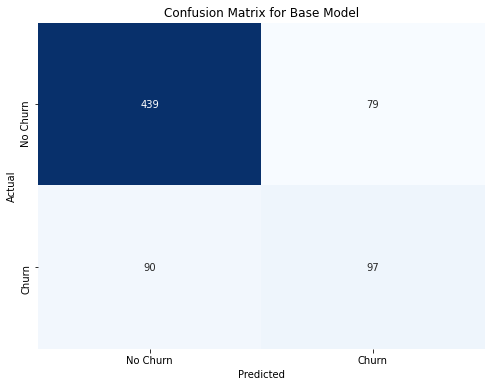

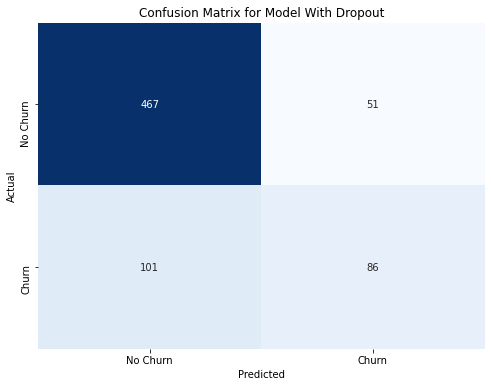

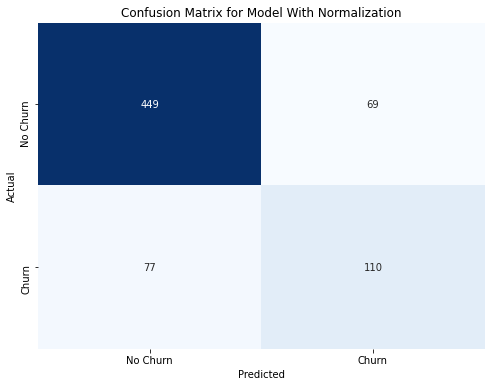

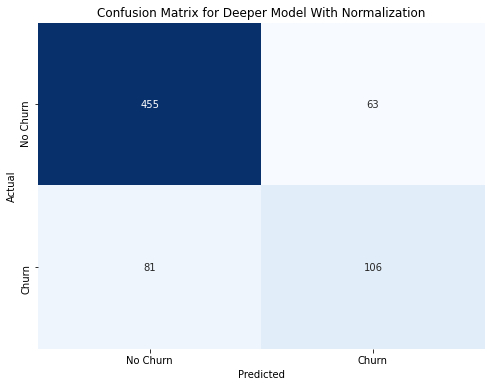

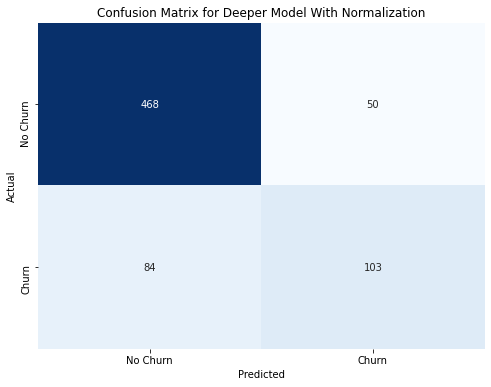

In [182]:
# Evaluate the base model on the test set
test_loss, test_accuracy = model_base.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\n(1) Base Model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Classification report for the base model
y_test_pred_base = model_base.predict(x_test_scaled)
y_test_pred_base = (y_test_pred_base > 0.5).astype(int) 
print("\nClassification Report for Base Model:")
print(classification_report(y_test, y_test_pred_base))
# Conufusion matrix for the base model
confusion_matrix_base = confusion_matrix(y_test, y_test_pred_base)
print("\nConfusion Matrix for Base Model:")
print(confusion_matrix_base)

# Evaluate the model with dropout on the test set
test_loss, test_accuracy = model_dropout.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\n(2) Model With Dropout Layers - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Classification report for the model with dropout
y_test_pred_dropout = model_dropout.predict(x_test_scaled)
y_test_pred_dropout = (y_test_pred_dropout > 0.5).astype(int)
print("\nClassification Report for Model With Dropout:")
print(classification_report(y_test, y_test_pred_dropout))
# Conufusion matrix for the model with dropout
confusion_matrix_dropout = confusion_matrix(y_test, y_test_pred_dropout)
print("\nConfusion Matrix for Dropout:")
print(confusion_matrix_dropout)


# Evaluate the model with normalization on the test set
test_loss, test_accuracy = model_normalize.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\n(3) Model With Normalization - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Classification report for the model with normalization
y_test_pred_normalize = model_normalize.predict(x_test_scaled)
y_test_pred_normalize = (y_test_pred_normalize > 0.5).astype(int)
print("\nClassification Report for Model With Normalization:")
print(classification_report(y_test, y_test_pred_normalize))
# Conufusion matrix for the model with dropout and normilization
confusion_matrix_normalize = confusion_matrix(y_test, y_test_pred_normalize)
print("\nConfusion Matrix for Dropout:")
print(confusion_matrix_normalize)

# Evaluate the deeper model with normalization on the test set
test_loss, test_accuracy = model_deeper_normalize.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\n(4) Deeper Model With Normalization - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Classification report for the deeper model with normalization
y_test_pred_deeper_normalize = model_deeper_normalize.predict(x_test_scaled)
y_test_pred_deeper_normalize = (y_test_pred_deeper_normalize > 0.5).astype(int)
print("\nClassification Report for Deeper Model With Normalization:")
print(classification_report(y_test, y_test_pred_deeper_normalize))
# Conufusion matrix for the deeper model with dropout and normilization
confusion_matrix_deeper = confusion_matrix(y_test,y_test_pred_deeper_normalize)
print("\nConfusion Matrix for Dropout:")
print(confusion_matrix_deeper)


# Evaluate the deeper model with normalization (with Early Stopping) on the test set
test_loss, test_accuracy = model_deeper_normalize_final.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\n(5) Deeper Model With Normalization - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Classification report for the deeper model with normalization
y_test_pred_deeper_normalize_final = model_deeper_normalize_final.predict(x_test_scaled)
y_test_pred_deeper_normalize_final = (y_test_pred_deeper_normalize_final > 0.5).astype(int)
print("\nClassification Report for Deeper Model With Normalization:")
print(classification_report(y_test, y_test_pred_deeper_normalize_final))
# Conufusion matrix for the deeper model with dropout and normilization
confusion_matrix_deeper_final = confusion_matrix(y_test,y_test_pred_deeper_normalize_final)
print("\nConfusion Matrix for Dropout:")
print(confusion_matrix_deeper_final)




# Visualize the confusion matrix for all models
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(confusion_matrix_base, "Confusion Matrix for Base Model")
plot_confusion_matrix(confusion_matrix_dropout, "Confusion Matrix for Model With Dropout")
plot_confusion_matrix(confusion_matrix_normalize, "Confusion Matrix for Model With Normalization")
plot_confusion_matrix(confusion_matrix_deeper, "Confusion Matrix for Deeper Model With Normalization")
plot_confusion_matrix(confusion_matrix_deeper_final, "Confusion Matrix for Deeper Model With Normalization")